In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from import_file import *

# 0. Combining Files

In [2]:
# file_dir = 'DSM'
# file_dir = 'SPI'
# file_dir = 'MSP'

# file_dir = 'DEN'
# file_dir = 'BIS'
# file_dir = 'LNK' 
file_dir = 'TOP' 

In [3]:
# DEN, BIS, ABR, LNK, TOP
fout=open(file_dir + "/all.dat","w")
for year in range(2005,2016):
    for month in range(1,13):
        for line in open('D:/1min采样间隔的数据/'+ str(year) + '/'+ file_dir +str(year)+"%02d"%(month)+".dat"):
            fout.write(line.replace("[", " ").replace("]", " "))
fout.close()

# 1. Read from US 1 min

In [4]:
if file_dir in ["MSP", 'DEN']: 
    # MSP
    df = pd.read_csv(file_dir + "/all.dat", skipinitialspace=True, error_bad_lines=False, sep=' ',
                    names = ['stationID','time','vis','day_type','vis2','day_type2','dir','speed','dir_max','speed_max','visual_range', 'unknown'])
else:
# # DSM  & SPI
    df = pd.read_csv(file_dir + "/all.dat", skipinitialspace=True, sep=' ', error_bad_lines=False,
                    names = ['stationID','time','vis','day_type','dir','speed','dir_max','speed_max','unname','visual_range', 'unknown'])

df

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stationID,time,vis,day_type,dir,speed,dir_max,speed_max,unname,visual_range,unknown
0,13996KTOP,TOP2005010100000600,0.069,N,58,10,52,11,NaN,NaN,NaN
1,13996KTOP,TOP2005010100010601,0.068,N,59,10,58,12,NaN,NaN,NaN
2,13996KTOP,TOP2005010100020602,0.068,N,60,9,55,10,NaN,NaN,NaN
3,13996KTOP,TOP2005010100030603,0.068,N,60,7,65,7,NaN,NaN,NaN
4,13996KTOP,TOP2005010100040604,0.067,N,62,6,65,9,NaN,NaN,NaN
5,13996KTOP,TOP2005010100050605,0.068,N,63,7,65,8,NaN,NaN,NaN
6,13996KTOP,TOP2005010100060606,0.069,N,62,7,63,9,NaN,NaN,NaN
7,13996KTOP,TOP2005010100070607,0.067,N,62,8,62,9,NaN,NaN,NaN
8,13996KTOP,TOP2005010100080608,0.068,N,62,7,67,8,NaN,NaN,NaN
9,13996KTOP,TOP2005010100090609,0.068,N,60,7,56,9,NaN,NaN,NaN


In [5]:
# Drop duplicate
df.drop_duplicates(subset='time', inplace=True)

# Drop too many field
df = df[df['unknown'].isnull()]
df.drop('unknown', axis=1, inplace=True)

# Drop missing field
# Cannot use visual range, since some previous data lack of
df.dropna(subset=['vis', 'dir','speed','dir_max','speed_max'], inplace=True)

df

,stationID,time,vis,day_type,dir,speed,dir_max,speed_max,unname,visual_range
0,13996KTOP,TOP2005010100000600,0.069,N,58,10,52,11,NaN,NaN
1,13996KTOP,TOP2005010100010601,0.068,N,59,10,58,12,NaN,NaN
2,13996KTOP,TOP2005010100020602,0.068,N,60,9,55,10,NaN,NaN
3,13996KTOP,TOP2005010100030603,0.068,N,60,7,65,7,NaN,NaN
4,13996KTOP,TOP2005010100040604,0.067,N,62,6,65,9,NaN,NaN
5,13996KTOP,TOP2005010100050605,0.068,N,63,7,65,8,NaN,NaN
6,13996KTOP,TOP2005010100060606,0.069,N,62,7,63,9,NaN,NaN
7,13996KTOP,TOP2005010100070607,0.067,N,62,8,62,9,NaN,NaN
8,13996KTOP,TOP2005010100080608,0.068,N,62,7,67,8,NaN,NaN
9,13996KTOP,TOP2005010100090609,0.068,N,60,7,56,9,NaN,NaN


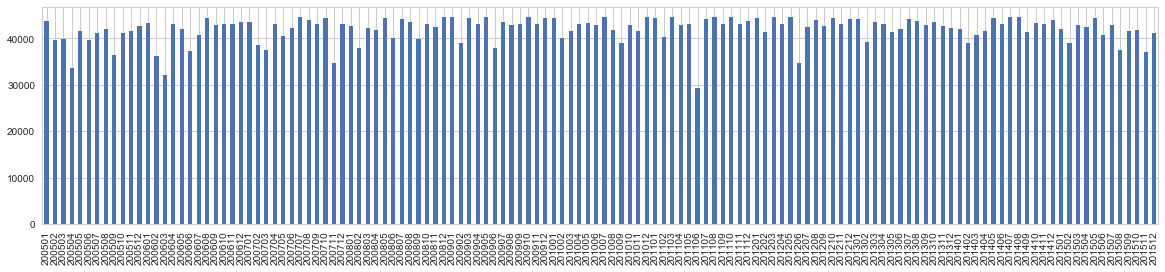

In [6]:
df['year_month'] = df['time'].apply(lambda x: x[3:9])
df['year_month'].value_counts().sort_index().plot(kind='bar', figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


1      15819
2      15659
3      15690
4      15658
5      15524
6      15300
7      14928
8      15129
9      14574
10     14338
11     14434
12     14221
13     14122
14     13803
15     13685
16     13653
17     13534
18     13106
19     13096
20     12864
21     12629
22     12338
23     12227
24     12350
25     11844
26     11611
27     11704
28     11330
29     11321
30     11111
       ...  
331    16490
332    16713
333    16626
334    16728
335    16884
336    16724
337    16791
338    16873
339    16728
340    17178
341    16901
342    17245
343    17232
344    17076
345    17101
346    16894
347    16626
348    16665
349    16260
350    16229
351    16201
352    15982
353    15871
354    15771
355    15992
356    16057
357    16128
358    15964
359    15679
360    15891
Name: dir, dtype: int64

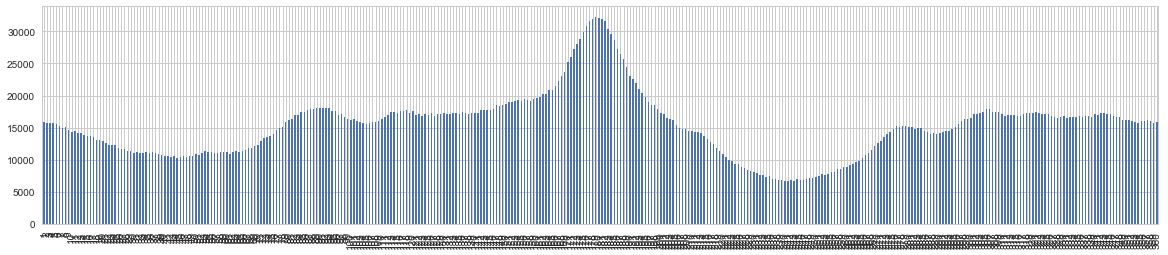

In [7]:
# Drop non-integer data for direction
df = df[df['dir'].apply(lambda x: str(x).isdigit())]
df['dir']=pd.to_numeric(df['dir'], downcast='integer', errors='coerce')
df = df[df['dir'].isin(arange(0,361))]
# Need to consider 0

display(df.dir.value_counts().sort_index())
df.dir.value_counts().sort_index().plot(kind='bar', figsize=(20,4))

0     162189
1     425482
2     437687
3     458174
4     477611
5     479147
6     458593
7     425535
8     387345
9     344400
10    296957
11    251590
12    208251
13    168257
14    133582
15    102639
16     77549
17     57363
18     41097
19     29230
20     19761
21     13004
22      8649
23      5463
24      3245
25      2011
26      1250
27       722
28       428
29       289
30       155
31        88
32        58
33        39
34        18
35         9
36         5
37         8
38         5
39         1
40         3
41         1
43         1
45         1
46         1
48         1
49         1
51         1
Name: speed, dtype: int64

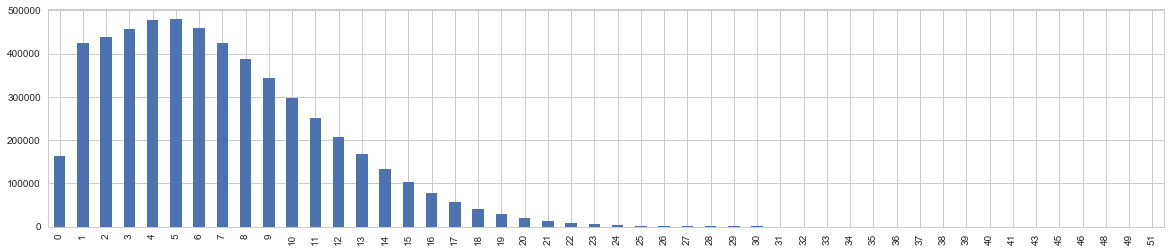

In [8]:
# Drop non-integer data for speed
df = df[df['speed'].apply(lambda x: str(x).isdigit())]
df['speed']=pd.to_numeric(df['speed'], downcast='integer', errors='coerce')

display(df.speed.value_counts().sort_index())
df.speed.value_counts().sort_index().plot(kind='bar', figsize=(20,4))

In [9]:
df.query('speed > 100')

,stationID,time,vis,day_type,dir,speed,dir_max,speed_max,unname,visual_range,year_month


In [10]:
df = df.query('speed < 200')
df = df[df['day_type'].str.contains("D|N") == True]
df['vis']=pd.to_numeric(df['vis'], errors='coerce')
df = df.dropna(subset=['vis'])

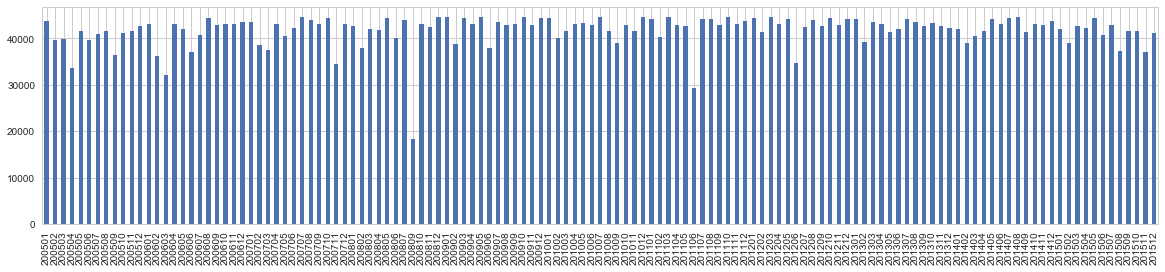

In [11]:
df['year_month'].value_counts().sort_index().plot(kind='bar', figsize=(20,4))

In [12]:
df['HrMn'] = df['time'].apply(lambda x: x[11:15])
df['date'] = df['time'].apply(lambda x: x[3:11])
df['time'] = df['date'].apply(lambda x: x[3:])

df=df[['stationID','date','HrMn', 'vis','day_type','dir','speed','dir_max','speed_max',]]
df.to_csv(file_dir + '/minute_avg.csv', index=False)

# 2. US 1 min to Hour avg

In [13]:
print(file_dir)

TOP


In [14]:
df = pd.read_csv(file_dir + '/minute_avg.csv', header=0, skipinitialspace=True, dtype={'HrMn': object})

df['speed']=pd.to_numeric(df['speed'], downcast='integer', errors='coerce')
df['dir']=pd.to_numeric(df['dir'], downcast='integer', errors='coerce')
df['dir_max']=pd.to_numeric(df['dir_max'], downcast='integer', errors='coerce')
df['speed_max']=pd.to_numeric(df['speed_max'], downcast='integer', errors='coerce')
df = df.dropna()
df=df[['date','HrMn','dir','speed','dir_max','speed_max']]

In [15]:
df['Hr']=df['HrMn'].apply(lambda x: int(str(x)[:-2]))
df.dir = np.radians(df.dir)
temp_df =df.groupby(['date', 'Hr']).agg({'speed' : np.mean,'dir': sp.stats.circmean,'speed_max': np.max}).reset_index()
df.dir = np.degrees(df.dir)
temp_df.dir = np.degrees(temp_df.dir)
temp_df['HrMn']=temp_df['Hr'].apply(lambda x: "%02d00"%x)

## Time Comparison

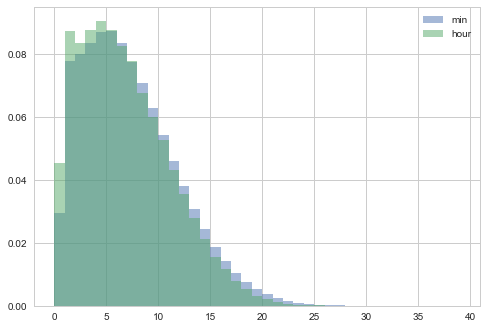

In [16]:
bins=arange(0,40)
df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True)

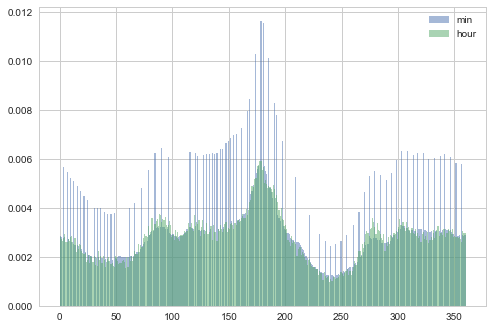

In [17]:
bins=arange(0,361)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True)

2005 - 2009


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


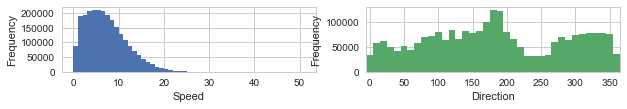

2010 - 2014


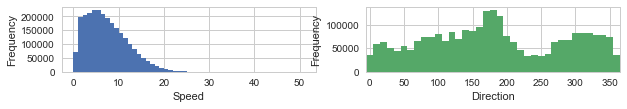

2015 - 2015


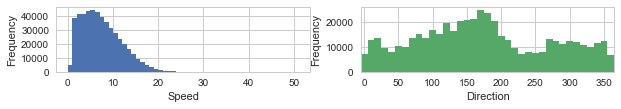

2005 - 2009


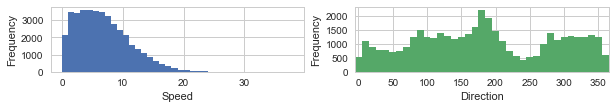

2010 - 2014


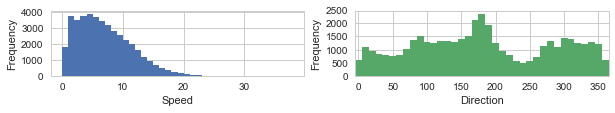

2015 - 2015


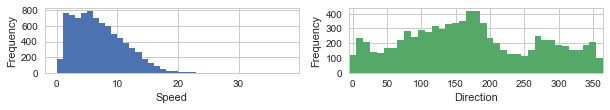

In [18]:
check_time_shift(df)
check_time_shift(temp_df)

In [19]:
temp_df.to_csv(file_dir + '/hr_avg.csv', index=False)

In [20]:
sss

NameError: name 'sss' is not defined

# 3. Read from Chinese Data sets

In [ ]:
import csv

ipath= "./data/NCDC/cn/上海/上海/dat.txt"
uipath = unicode(ipath , "utf8")

with open(uipath) as fin, open('./data/NCDC/test.txt', 'w') as fout:
    o=csv.writer(fout)
    for line in fin:
        o.writerow(line.split())